In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


In [31]:
lasso_rsquared = []

In [32]:
#Run the model for many alphas.
for lambd in range(1, 50, 2):
    lassBig = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lassBig.fit(X_train2, Y_train)
    lasso_rsquared.append(lassBig.score(X_test2, Y_test))
print(lasso_rsquared)

[0.0039128677178866811, 0.0034264142929819612, 0.0029325668560185036, 0.0024313254069958656, 0.001923125443936802, 0.0014075912089819287, 0.00088467686859206029, 0.00035438242276764065, -1.8203821148254917e-06, -1.8495358098391532e-06, -1.8786974844697824e-06, -1.9078671387173785e-06, -1.9370447723598971e-06, -1.9662303858414276e-06, -1.9954239789399253e-06, -2.0246255514333455e-06, -2.053835103543733e-06, -2.0830526352710876e-06, -2.1122781468374541e-06, -2.1415116375766985e-06, -2.1707531081549547e-06, -2.2000025583501781e-06, -2.2292599879403241e-06, -2.2585253971474373e-06, -2.2877987859715176e-06]


/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


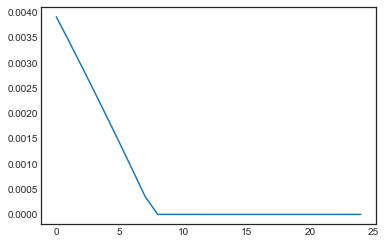

In [33]:
plt.plot(lasso_rsquared)

In [37]:
ridge_rsquared = []

In [38]:
for lambd in range(1, 50, 2):
    ridgeBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeBig.fit(X_train2, Y_train)
    ridge_rsquared.append(ridgeBig.score(X_test2, Y_test))
print(ridge_rsquared)

[0.56306807425895267, 0.56312162329859505, 0.56314670442323322, 0.56316292806981871, 0.56317518424330748, 0.5631852638113366, 0.56319397663648196, 0.56320174219874808, 0.56320879954180603, 0.56321529493569611, 0.56322132297391292, 0.56322694760811354, 0.56323221368412102, 0.56323715363213855, 0.56324179153016884, 0.56324614566966724, 0.5632502302302288, 0.56325405640444903, 0.56325763317259558, 0.56326096784798407, 0.56326406646856553, 0.56326693408295292, 0.56326957496274233, 0.5632719927623222, 0.56327419064072171]


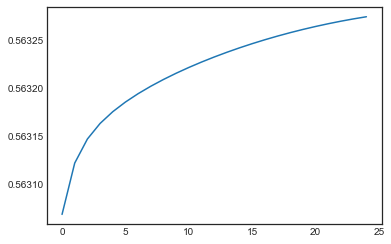

In [45]:
plt.plot(ridge_rsquared)